In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv("car data.csv")

In [4]:
dataset.head(3)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25


In [5]:
dataset.drop(columns='Selling_type',inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [7]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [8]:
dataset.select_dtypes(include="object").columns

Index(['Car_Name', 'Fuel_Type', 'Transmission'], dtype='object')

In [9]:
cn = LabelEncoder()
cn.fit(dataset["Car_Name"])
dataset["Car_Name"]  =  cn.transform(dataset["Car_Name"])

In [10]:
ft = LabelEncoder()
ft.fit(dataset["Fuel_Type"])
dataset["Fuel_Type"]  =  ft.transform(dataset["Fuel_Type"])

In [11]:
Tr = LabelEncoder()
Tr.fit(dataset["Transmission"])
dataset["Transmission"]  =  Tr.transform(dataset["Transmission"])

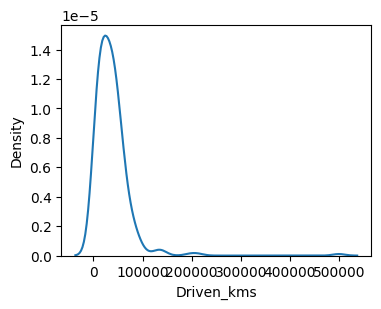

In [12]:
plt.figure(figsize=(4,3))
sns.kdeplot(x="Driven_kms",data=dataset)
plt.show()

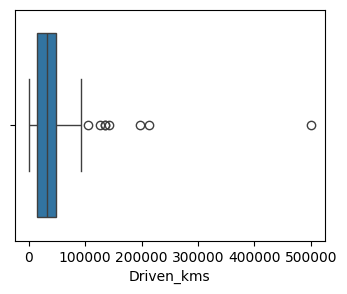

In [13]:
plt.figure(figsize=(4,3))
sns.boxplot(x="Driven_kms",data=dataset)
plt.show()

In [14]:
q1 = np.percentile(dataset["Driven_kms"],25)
q3 = np.percentile(dataset["Driven_kms"],75)
q1,q3

(15000.0, 48767.0)

In [15]:
iqr = q3-q1

In [16]:
max_r = q3+(1.5*iqr)
min_r = q1-(1.5*iqr)
min_r,max_r

(-35650.5, 99417.5)

In [17]:
dataset.loc[dataset["Driven_kms"] > max_r, "Driven_kms"] = max_r

C:\Users\karan\AppData\Local\Temp\ipykernel_5756\342313978.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '99417.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset["Driven_kms"] > max_r, "Driven_kms"] = max_r


In [18]:
dataset.shape

(301, 8)

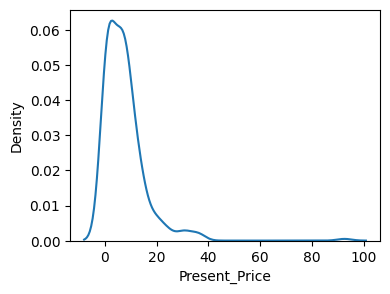

In [19]:
plt.figure(figsize=(4,3))
sns.kdeplot(x="Present_Price",data=dataset)
plt.show()

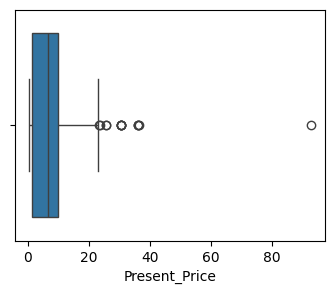

In [20]:
plt.figure(figsize=(4,3))
sns.boxplot(x="Present_Price",data=dataset)
plt.show()

In [21]:
q11 = np.percentile(dataset["Present_Price"],25)
q31 = np.percentile(dataset["Present_Price"],75)
q11,q31

(1.2, 9.9)

In [22]:
iqr1 = q31-q11

In [23]:
max_r1 = q31+(1.5*iqr1)
min_r1 = q11-(1.5*iqr1)
min_r1,max_r1

(-11.850000000000001, 22.950000000000003)

In [24]:
dataset.loc[dataset["Present_Price"] > max_r1, "Present_Price"] = max_r1

In [25]:
# Present_Price_ft = FunctionTransformer(func= np.log1p )
# Present_Price_ft.fit(dataset["Present_Price"])
# dataset["Present_Price"] = Present_Price_ft.transform(dataset["Present_Price"])

In [26]:
# Driven_kms_ft = FunctionTransformer(func= lambda x : x**0.5)
# Driven_kms_ft.fit(dataset["Driven_kms"])
# dataset["Driven_kms"] = Driven_kms_ft.transform(dataset["Driven_kms"])

In [27]:
dataset.head(3)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000.0,2,1,0,3.35
1,93,2013,9.54,43000.0,1,1,0,4.75
2,68,2017,9.85,6900.0,2,1,0,7.25


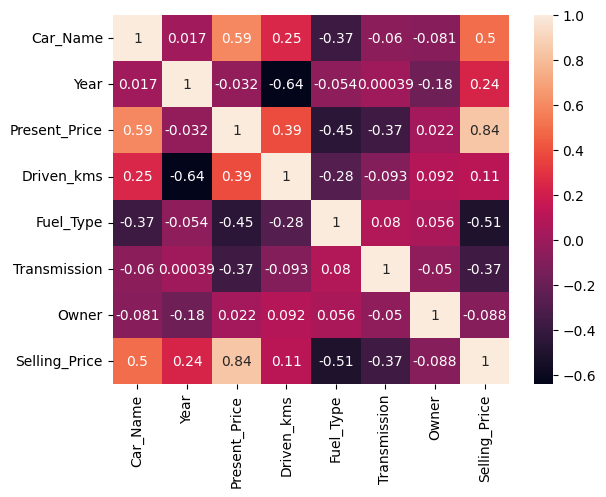

In [28]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [29]:
x = dataset.iloc[:,:-1]
y = dataset["Selling_Price"]

In [30]:
sc = StandardScaler()
sc.fit(x)
x  = pd.DataFrame(sc.transform(x),columns=x.columns)

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(79.82586149837685, 80.08254651565387)

In [37]:
lr.predict([[0.251795,0.475308,1.060700,-0.018011,0.500183,0.391480,-0.17450]])

C:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.91406638])

In [53]:
x_test.head(1)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
288,0.251795,0.475308,1.0607,-0.018011,0.500183,0.39148,-0.174501


In [45]:
new_data1 = pd.read_csv("car data.csv")

In [46]:
new_data = new_data1.drop(columns=["Present_Price","Selling_type","Selling_Price"])

In [73]:
new_data = new_data.head(1)
new_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,1.074323,0.128897,-0.241716,-0.313531,0.500183,0.39148,-0.174501


In [68]:
sl = new_data1[(new_data1["Car_Name"]=="ritz")&(new_data1["Year"]==2014)]["Present_Price"][0]

In [69]:
new_data.insert(2,"Present_Price",sl)

In [60]:
new_data["Car_Name"] = cn.transform(new_data["Car_Name"])

In [63]:
new_data["Fuel_Type"] = ft.transform(new_data["Fuel_Type"])

In [66]:
new_data["Transmission"] = Tr.transform(new_data["Transmission"])

In [72]:
new_data = pd.DataFrame(sc.transform(new_data),columns=new_data.columns)

In [74]:
lr.predict(new_data)

array([3.4830288])

In [96]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose  import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [81]:
new_data_x = new_data1.drop(columns=["Selling_type","Selling_Price"])
new_data_x.head(2)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Manual,0
1,sx4,2013,9.54,43000,Diesel,Manual,0


In [102]:
new_data_y = new_data1["Selling_Price"]

In [ ]:
new_data_x.columns

In [92]:
num_data = new_data_x.select_dtypes(["int64","float64"]).columns
cat_data = new_data_x.select_dtypes(["object"]).columns

In [97]:
c1 = ColumnTransformer([("t1",OrdinalEncoder(),[0,4,5])],remainder="passthrough")

In [105]:
pipe = Pipeline(steps=[("en",ColumnTransformer([("t1",OrdinalEncoder(),[0,4,5])],remainder="passthrough"))
                       ,("sec",StandardScaler()),("lr_mo",LinearRegression())])

In [106]:
pipe.fit(new_data_x,new_data_y)

Pipeline(steps=[('en',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  [0, 4, 5])])),
                ('sec', StandardScaler()), ('lr_mo', LinearRegression())])

In [107]:
import pickle

In [108]:
p = open("mod.txt","wb")
pickle.dump(pipe,p)
p.close()